In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# This is the script using the toy routing map for navigation
# After the ultrosonic scanning and the A_star route finding, you should have a map similar to this toy map that highlights the 
# path in 1 and the rest in 0 in a squared matrix (numpy array)

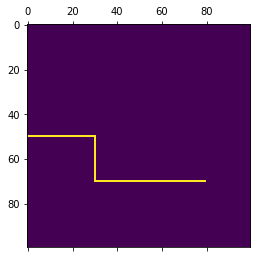

In [64]:
# Build a toy map
maze = np.zeros([100,100])
maze[50,:30]=1
maze[50:70, 30]=1
maze[70,30:80]=1
plt.matshow(maze)

In [65]:
# Find out the path in the toy map
path_arr = np.stack((np.where(maze==1)[0], np.where(maze==1)[1]), axis = 1)
path_list = path_arr.tolist()
print(path_arr)

[[50  0]
 [50  1]
 [50  2]
 [50  3]
 [50  4]
 [50  5]
 [50  6]
 [50  7]
 [50  8]
 [50  9]
 [50 10]
 [50 11]
 [50 12]
 [50 13]
 [50 14]
 [50 15]
 [50 16]
 [50 17]
 [50 18]
 [50 19]
 [50 20]
 [50 21]
 [50 22]
 [50 23]
 [50 24]
 [50 25]
 [50 26]
 [50 27]
 [50 28]
 [50 29]
 [50 30]
 [51 30]
 [52 30]
 [53 30]
 [54 30]
 [55 30]
 [56 30]
 [57 30]
 [58 30]
 [59 30]
 [60 30]
 [61 30]
 [62 30]
 [63 30]
 [64 30]
 [65 30]
 [66 30]
 [67 30]
 [68 30]
 [69 30]
 [70 30]
 [70 31]
 [70 32]
 [70 33]
 [70 34]
 [70 35]
 [70 36]
 [70 37]
 [70 38]
 [70 39]
 [70 40]
 [70 41]
 [70 42]
 [70 43]
 [70 44]
 [70 45]
 [70 46]
 [70 47]
 [70 48]
 [70 49]
 [70 50]
 [70 51]
 [70 52]
 [70 53]
 [70 54]
 [70 55]
 [70 56]
 [70 57]
 [70 58]
 [70 59]
 [70 60]
 [70 61]
 [70 62]
 [70 63]
 [70 64]
 [70 65]
 [70 66]
 [70 67]
 [70 68]
 [70 69]
 [70 70]
 [70 71]
 [70 72]
 [70 73]
 [70 74]
 [70 75]
 [70 76]
 [70 77]
 [70 78]
 [70 79]]


In [51]:
# Scheme of navigation 
# 1. Give move instruction to the car, move_forward, turn_left or turn_right 
#    based on the location in the path and the current position of the car
# 2. Once the car reaches the "turning" position, the map and path will be updated 
#    by fliping horizontally followed by transpose. 
#    In this way, the relative moving direction of the car will be always horizontal 
#    and the same condition used for deciding moving forwar, turning left or right won't change 
#    by the change of the car orientation. 
# 3. The visted location on the path is removed from the path list as car move along

In [66]:
# Functions that update maze and path
def update_maze(maze):
    return np.transpose(np.flip(maze,1))
def update_location(loc):
    loc_f = np.array([loc[0], maze.shape[1]-loc[1]])
    loc_f_t = np.flip(loc_f)
    return loc_f_t
def update_path(path):
    path_new = []
    for loc in path:
        loc_new = update_location(loc)
        path_new.append(loc_new)
    return np.array(path_new)

In [67]:
def move_instruction(path_arr, maze):
    car_pos = path_arr[0]
    count = 0
    for location in path_arr[1:]:
        if (list(location - car_pos) == [0,1]) or (list(location - car_pos) == [0,-1]):
            print("forward")
            #move_forward()
            car_pos = location
            count += 1
        
        elif list(location - car_pos) == [1,0]:
            print("turn right")
            #move_right()
            break
        
        elif list(location - car_pos) == [-1,0]:
            #move_left()
            print("turn left")
            break
        
    maze = update_maze(maze) #flip and transpose maze
    path_arr = update_path(path_arr) #update the locations in the path accoring to the maze update
    #car_pos = path_arr[count] #update the car_pos in the refreshed maze 
    path_arr = path_arr[count:] #remove the passed locations in the path
    return car_pos, path_arr, maze

forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
turn right
[50 30]
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
turn left
[70 70]
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
[30 21]


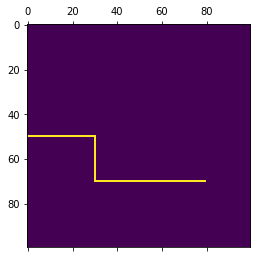

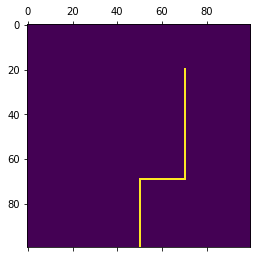

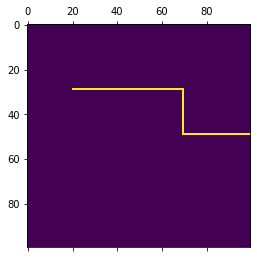

In [68]:
while path_arr.shape[0] > 1:
    plt.matshow(maze)
    car_pos, path_arr, maze = move_instruction(path_arr, maze)
    print(car_pos)
    

In [54]:
car_pos, path_arr, maze = move_instruction(path_arr, maze)

forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
turn right


In [55]:
car_pos

array([50, 30], dtype=int64)

In [56]:
path_arr

array([[70, 50],
       [70, 51],
       [70, 52],
       [70, 53],
       [70, 54],
       [70, 55],
       [70, 56],
       [70, 57],
       [70, 58],
       [70, 59],
       [70, 60],
       [70, 61],
       [70, 62],
       [70, 63],
       [70, 64],
       [70, 65],
       [70, 66],
       [70, 67],
       [70, 68],
       [70, 69],
       [70, 70],
       [69, 70],
       [68, 70],
       [67, 70],
       [66, 70],
       [65, 70],
       [64, 70],
       [63, 70],
       [62, 70],
       [61, 70],
       [60, 70],
       [59, 70],
       [58, 70],
       [57, 70],
       [56, 70],
       [55, 70],
       [54, 70],
       [53, 70],
       [52, 70],
       [51, 70],
       [50, 70],
       [49, 70],
       [48, 70],
       [47, 70],
       [46, 70],
       [45, 70],
       [44, 70],
       [43, 70],
       [42, 70],
       [41, 70],
       [40, 70],
       [39, 70],
       [38, 70],
       [37, 70],
       [36, 70],
       [35, 70],
       [34, 70],
       [33, 70],
       [32, 70

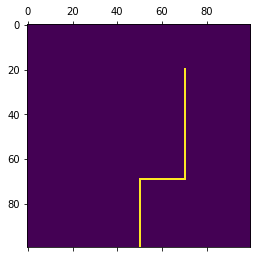

In [57]:
plt.matshow(maze)

In [58]:
car_pos, path_arr, maze = move_instruction(path_arr, maze)

forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
turn left


In [59]:
car_pos

array([70, 70], dtype=int64)

In [60]:
path_arr

array([[30, 70],
       [30, 69],
       [30, 68],
       [30, 67],
       [30, 66],
       [30, 65],
       [30, 64],
       [30, 63],
       [30, 62],
       [30, 61],
       [30, 60],
       [30, 59],
       [30, 58],
       [30, 57],
       [30, 56],
       [30, 55],
       [30, 54],
       [30, 53],
       [30, 52],
       [30, 51],
       [30, 50],
       [30, 49],
       [30, 48],
       [30, 47],
       [30, 46],
       [30, 45],
       [30, 44],
       [30, 43],
       [30, 42],
       [30, 41],
       [30, 40],
       [30, 39],
       [30, 38],
       [30, 37],
       [30, 36],
       [30, 35],
       [30, 34],
       [30, 33],
       [30, 32],
       [30, 31],
       [30, 30],
       [30, 29],
       [30, 28],
       [30, 27],
       [30, 26],
       [30, 25],
       [30, 24],
       [30, 23],
       [30, 22],
       [30, 21]], dtype=int64)

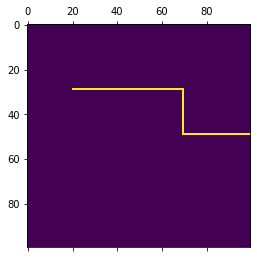

In [61]:
plt.matshow(maze)

In [62]:
car_pos, path_arr, maze = move_instruction(path_arr, maze)

forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward
forward


In [63]:
car_pos

array([30, 21], dtype=int64)

In [48]:
path_arr

array([[79, 30]], dtype=int64)

In [ ]:
#update_location(path_arr[30])
#update_path(path_arr)

In [ ]:
path_arr